###**Project-Name: Predict VolksWagen (VW) used car using Machine Learning Model**
Determining whether the listed price of a used car is a challenging task, due to the many factors that drive a used vehicle’s price on the market.Several factors, including mileage, make, model, year, etc. can influence the actual worth of a car. From the perspective of a seller, it is also a dilemma to price a used car appropriately.
In this Notebook, I am going to use various machine learning model that will help us predict car prices.The main aim of this project is to predict the price of used car based on various features.

**By- Md. Azim Khan**





###**Importing Libraries**




In [171]:
import pandas as pd
import numpy as np
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

import matplotlib.pyplot as plt
import seaborn as sns

# to remove unnecessary warnings
import warnings

warnings.filterwarnings('ignore')

# to generate clear images
sns.set_context('talk')

### **Load VW dataset**

In [172]:
df = pd.read_csv("/content/drive/MyDrive/Python programming/Dataset/vw.csv")
# display the first few rows of the data
display(df.head(10))

,model,year,price,transmission,mileage,fuelType,mpg,engineSize
0,T-Roc,2019,25000,Automatic,13904,Diesel,49.6,2.0
1,T-Roc,2019,26883,Automatic,4562,Diesel,49.6,2.0
2,T-Roc,2019,20000,Manual,7414,Diesel,50.4,2.0
3,T-Roc,2019,33492,Automatic,4825,Petrol,32.5,2.0
4,T-Roc,2019,22900,Semi-Auto,6500,Petrol,39.8,1.5
5,T-Roc,2020,31895,Manual,10,Petrol,42.2,1.5
6,T-Roc,2020,27895,Manual,10,Petrol,42.2,1.5
7,T-Roc,2020,39495,Semi-Auto,10,Petrol,32.5,2.0
8,T-Roc,2019,21995,Manual,10,Petrol,44.1,1.0
9,T-Roc,2019,23285,Manual,10,Petrol,42.2,1.5


**Explanation of Feature variables:**

**model**: The model of a car is the name used by a manufacturer to market a range of similar cars.

**year**: the year car was made

**transmission**: it converts the engine’s combustion power to momentum which drives the wheels

**mileage**: the number of miles the vehicle has driven

**fuelType:** energy source of the vehicle

**mpg:** miles per gallon the vehicle can travel

**engineSize:** Engine size is the volume of fuel and air that can be pushed through a car's cylinders

**Target Variable:**

**price:** selling price of the car

In [173]:
# for checking missing value in VW dataframe
print(df.info())
print(df.columns)        

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15157 entries, 0 to 15156
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         15157 non-null  object 
 1   year          15157 non-null  int64  
 2   price         15157 non-null  int64  
 3   transmission  15157 non-null  object 
 4   mileage       15157 non-null  int64  
 5   fuelType      15157 non-null  object 
 6   mpg           15157 non-null  float64
 7   engineSize    15157 non-null  float64
dtypes: float64(2), int64(3), object(3)
memory usage: 947.4+ KB
None
Index(['model', 'year', 'price', 'transmission', 'mileage', 'fuelType', 'mpg',
       'engineSize'],
      dtype='object')


**Remarks:**
1.  Number of observations (rows) = 15157
2.  Number of columns = 8 (7 feature variables and 1 target variable)
3.  Number of categorical variables = 3: model, transmission, fuelType
4.  Number of numerical variables = 4:   year, mileage, mpg, engineSize
5. The dataset has no missing values

### **Data Preprocessing**

**One-hot Encoding**

In [174]:
# get_dummies from pandas for one-hot encoding
df = pd.get_dummies(df, drop_first=True) # drop_first true for removing 1st column

**Label Encoding**

In [175]:
# when use the Label Encoding on Categorical features, uncomment the following code

# LE = LabelEncoder()
# df['transmission'] = LE.fit_transform(df['transmission'])
# df['fuelType'] = LE.fit_transform(df['fuelType'])
# df['model'] = LE.fit_transform(df['model'])
# df['year'] = LE.fit_transform(df['year'])
# df['transmission'] = df['transmission'].astype('category')
# df['fuelType'] = df['fuelType'].astype('category')
# df['model'] = df['model'].astype('category')
# df['year'] = df['year'].astype('category')
# display(df.head(10))
# print(df.info())

**Comment:** Here, LabelEncoding is not used,as prediction Error is higher than one-hot encoding.

**Separating the features and target variable**

In [176]:
target = ['price']
X = df.drop('price', axis=1)
y = df[target]

print(X.shape, y.shape)

(15157, 35) (15157, 1)


**Create train and test set**

In [177]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(12125, 35) (3032, 35) (12125, 1) (3032, 1)


**Comment:** Data is seperated in by train test split, here 80% data is training data that will be used train the ML model and 20% data will be used to test the model.

**Training with Linear Regression model**

In [178]:
model = LinearRegression()
model = model.fit(X_train, y_train) # by fit, model will be trained by training data

**Linear Regression Coefficients and intercept**

In [179]:
# y = mx +c standard linear equation for one features,x
# y = m1x1 + m2x2+ m3x3+......+C (for multiple features x1,x2,x3)
# model coefficient is the value of m and for 35 features this will be 35 different value
model.coef_

array([[ 1.24035155e+03, -7.55052174e-02, -6.70851377e+01,
         7.04740514e+03,  2.11526842e+03, -2.02323490e+03,
        -3.54834636e+03, -2.18298206e+03, -3.46688112e+03,
        -1.13568140e+03, -3.39055782e+03,  3.15166432e+04,
         1.68891107e+04, -8.58786785e+02,  3.23725004e+02,
        -1.33845146e+03, -2.78914116e+03, -4.55907188e+03,
        -1.19642557e+03, -3.19585027e+03, -2.85799946e+03,
         5.65442158e+02,  2.02790045e+03,  7.57826615e+02,
         1.37303150e+03,  1.29578299e+03,  4.67604381e+03,
         4.04082466e+03,  1.12063725e+03, -5.29202593e+03,
        -1.72441228e+03, -9.17617358e+01,  1.24607096e+04,
         3.00108675e+03,  1.97648265e+03]])

In [180]:
# y = mx +c, c is the intercept value
model.intercept_

array([-2490358.430771])

In [181]:
# np.squeeze is used to remove the axex as model.coef_ is 2D, but we need 1D
display(model.coef_.shape)
squeeze_= np.squeeze(model.coef_)
display(squeeze_.shape)

(1, 35)

(35,)

In [182]:
# now coefficents for 35 features in a dataFrame

coefficients = pd.DataFrame({'features':X.columns, 'coefficients':squeeze_}) 
coefficients = coefficients.sort_values(by='coefficients')
display(coefficients)

,features,coefficients
29,model_ Up,-5292.025934
17,model_ Jetta,-4559.071876
6,model_ CC,-3548.346363
8,model_ Caddy Life,-3466.881119
10,model_ Caddy Maxi Life,-3390.557824
19,model_ Polo,-3195.850273
20,model_ Scirocco,-2857.999461
16,model_ Golf SV,-2789.141158
7,model_ Caddy,-2182.982055
5,model_ Beetle,-2023.234903


**Comment:** model_Up features coefficient is -5292 (negative), that means price will be decreased if model_Up features value increase; whereas coefficient for engineSize is 7047(positive), if engineSize increses price will be incresed 

**Model Prediction**

In [183]:
y_pred = model.predict(X_test)
print(y_pred)

[[12869.20651873]
 [23850.70836896]
 [13526.6767613 ]
 ...
 [ 9295.26406926]
 [ 4972.09419091]
 [ 5855.52104452]]


In [184]:
y_test['predicted_price'] = y_pred
y_test = y_test.rename(columns={"price":"Actual_price"})
display(y_test.head(5))

,Actual_price,predicted_price
7342,14450,12869.206519
10328,23950,23850.708369
14992,10495,13526.676761
8466,9990,9907.396397
10347,21998,21390.862256


**Comment:**  we see that model predicted value is 12869, whereas the actual price is 14450. Here model predicted the lower price than actual price. From second value, model prediction is 23850, but actual price is 23950.

**Prediction Error**

In [185]:
# mean absolute error
MAE = mean_absolute_error(y_test['Actual_price'], y_test['predicted_price'])
print("mean absolute error = ", MAE)

# mean squared error
MSE = mean_squared_error(y_test['Actual_price'], y_test['predicted_price'])
print("mean squared error = ", MSE)

# root mean squared error
RMSE = mean_squared_error(y_test['Actual_price'], y_test['predicted_price'], squared=False)
print("root mean squared error = ", RMSE)

# coefficient of determination
r_squared = r2_score(y_test['Actual_price'], y_test['predicted_price']) 
print("coefficient of determination = ", r_squared)

mean absolute error =  1832.1290936603225
mean squared error =  6783022.165714365
root mean squared error =  2604.4235764779824
coefficient of determination =  0.8856956177560219


**Error comparison:**

**Label Encoding:**
1. Mean absolute Error = 2506 (Lower is better)
2. Mean Squared Error - 15050490 (Lower is better)
3. root mean squred error = 3879(Lower is better)
4. coefficient of determination = 0.746 (1 refer to best model, -1 is for worst model)


---
**One-hot Encoding:**
1. Mean absolute Error = 1832
2. Mean Squared Error - 6783022
3. root mean squred error = 2604
4. coefficient of determination = 0.8856

**Visualization of actual and predicted target variable**

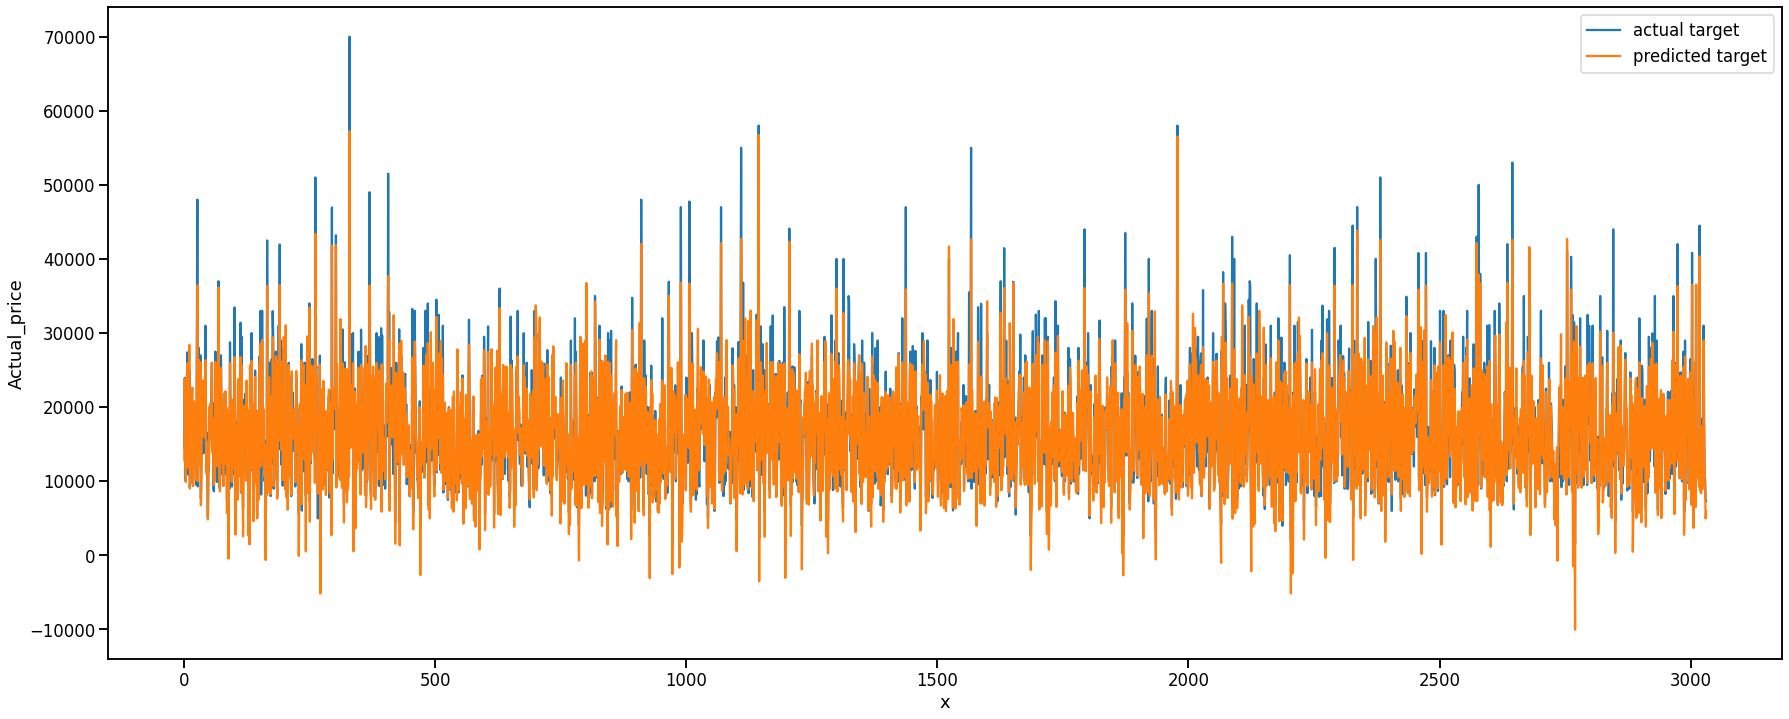

In [186]:
# add a new column for reference axis
y_test['x'] = np.arange(0,y_test.shape[0],1)
plt.figure(figsize=(30,12))
sns.lineplot(x='x', y='Actual_price', data=y_test, label='actual target')
sns.lineplot(x='x', y='predicted_price', data=y_test, label='predicted target')
plt.show()

**Comment:** From above graph, we see predicted price cross the zero in some cases and show negative price that is not possible.

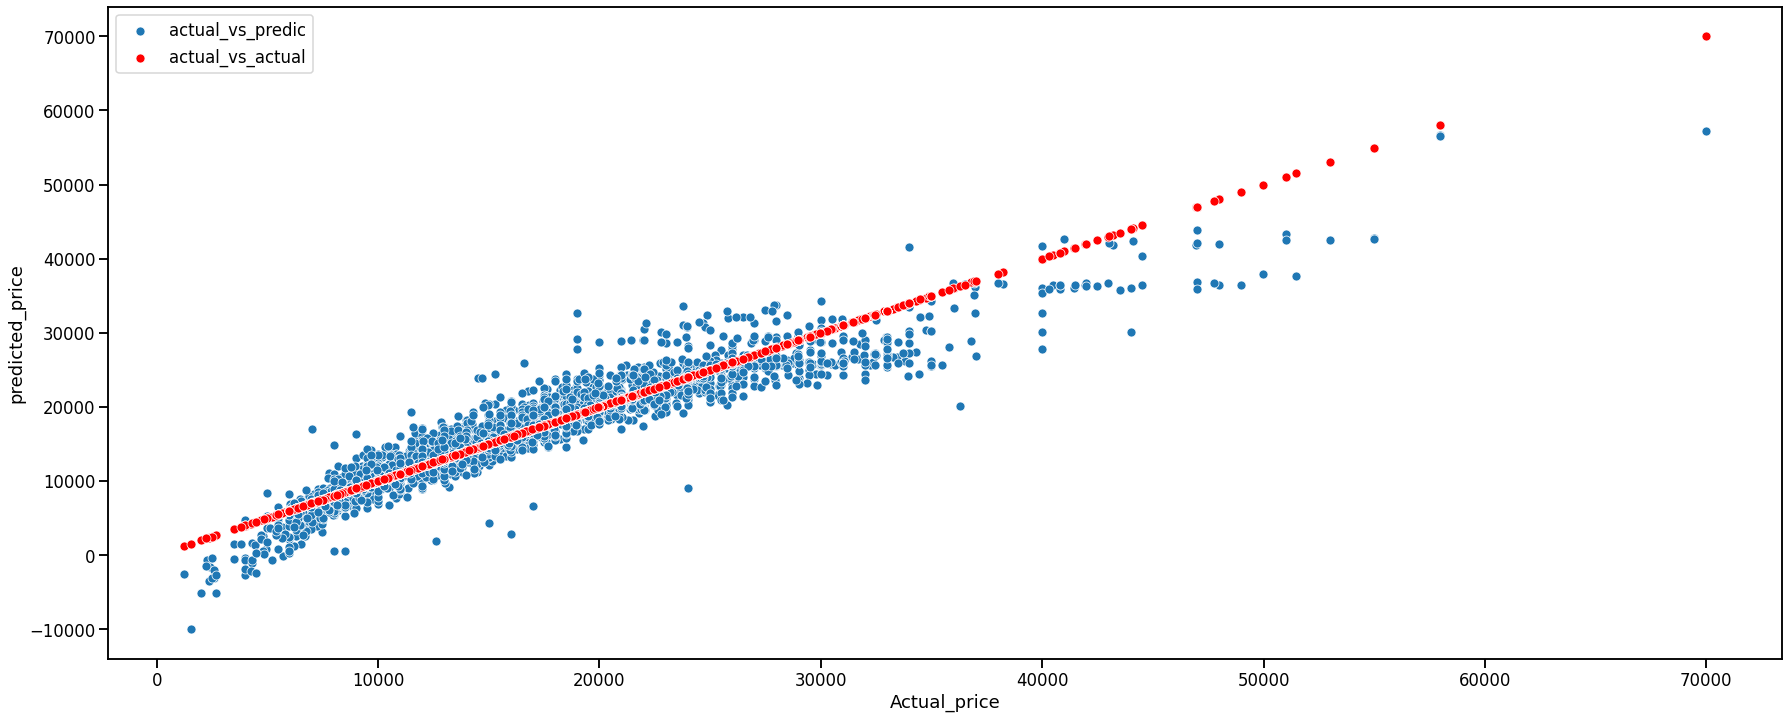

In [187]:
plt.figure(figsize=(30,12))
sns.scatterplot(x='Actual_price', y='predicted_price', data=y_test, label='actual_vs_predic')
sns.scatterplot(x='Actual_price', y='Actual_price', data=y_test, color='red', label = 'actual_vs_actual')
plt.show()

**Comment:** Actual price Vs Actul price shows a linear line, but Actual price vs predicted price doesnot follow linear line all the time; when actual price is around 35000, the predicted price is scatted which does not follow the straight line.